In [1]:
import xarray as xr
import numpy as np

import matplotlib.pylab as plt

import pandas as pd

from matplotlib import cm

import cartopy.feature as cfeature
import matplotlib.pylab as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
from cartopy.util import add_cyclic_point
from xarrayutils.utils import linear_trend, xr_linregress

In [2]:
ds1_filename='HFDS_Assim_Ensemble_Mean'
ds1=xr.open_dataset('D:/TRABAJO/DATA/NORcpm/assim/hfds/hfds_Omon_NorCPM1_dcppA-assim_ensmean_anomaly.nc')
path='D:/TRABAJO/DATA/NORcpm/Correlation/hfds/'
ds3=xr.open_dataset('D:/TRABAJO/DATA/NORcpm/assim/siconc/siconc_SImon_NorCPM1_dcppA-assim_ensmean.nc')

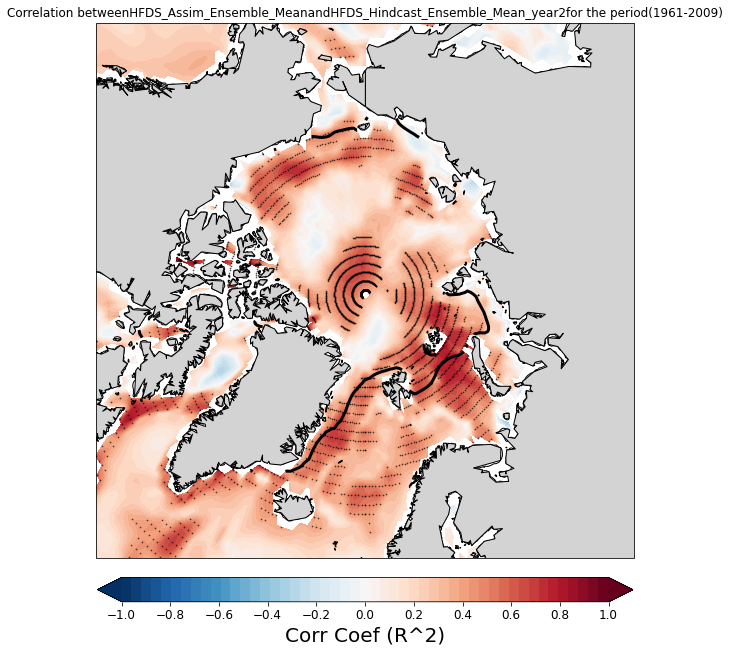

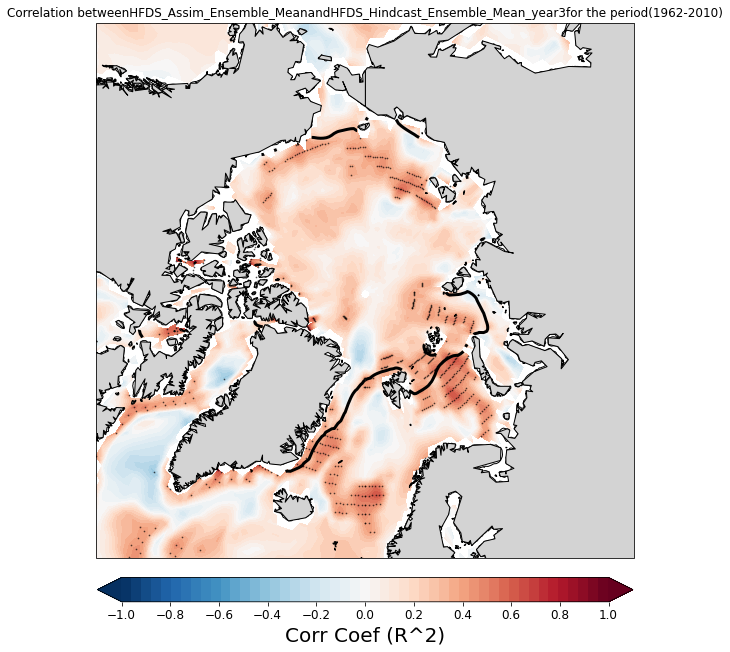

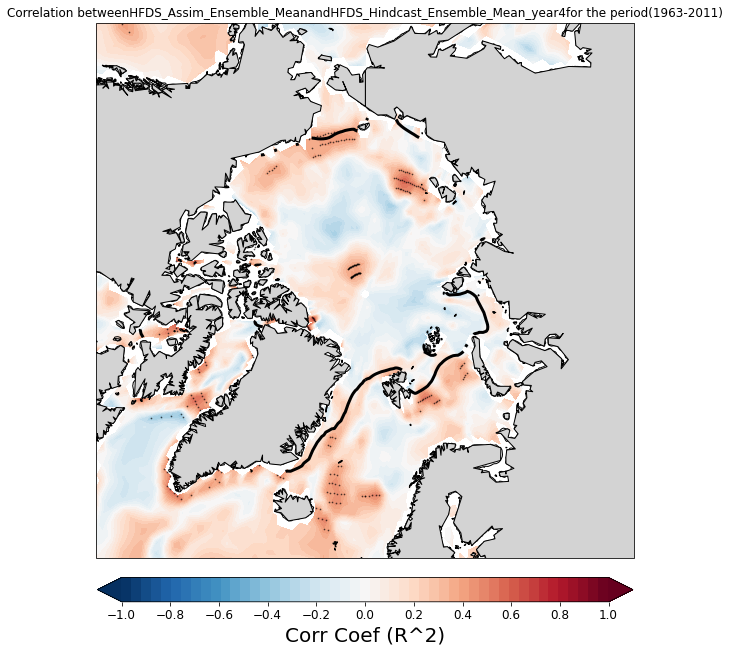

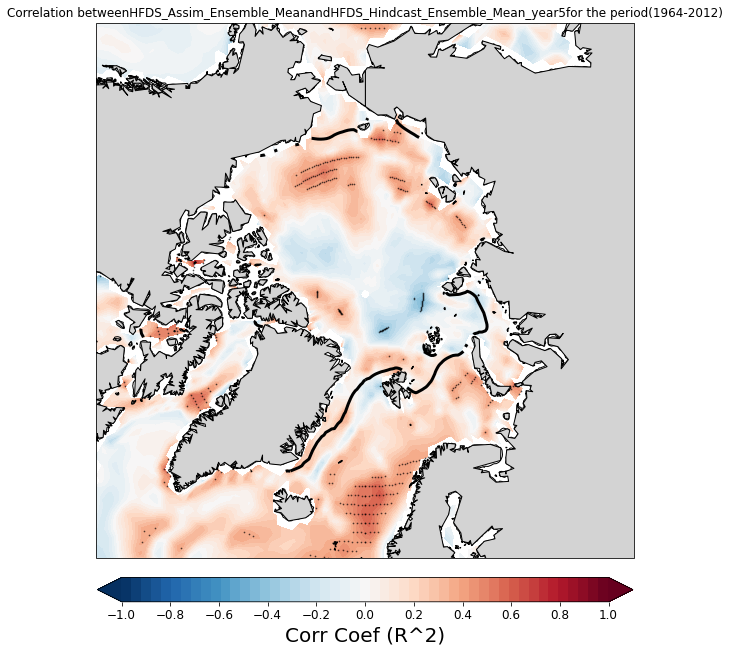

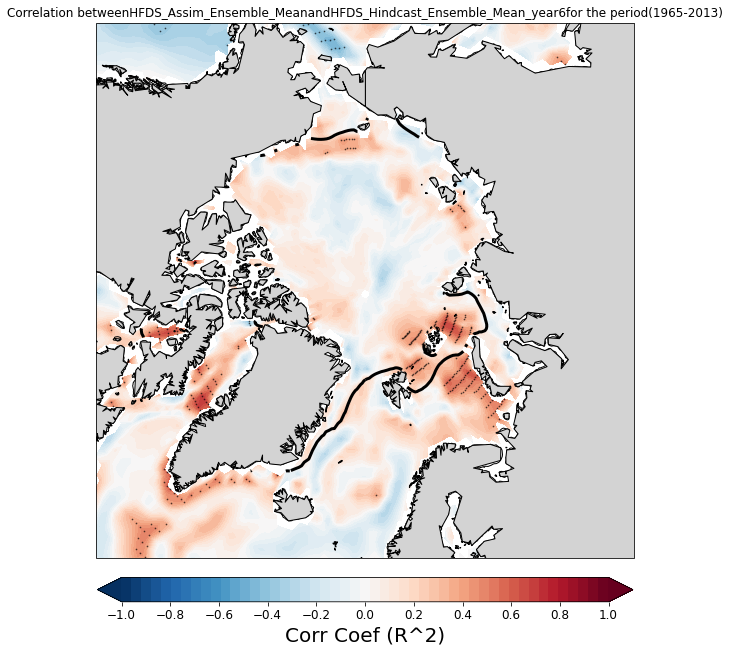

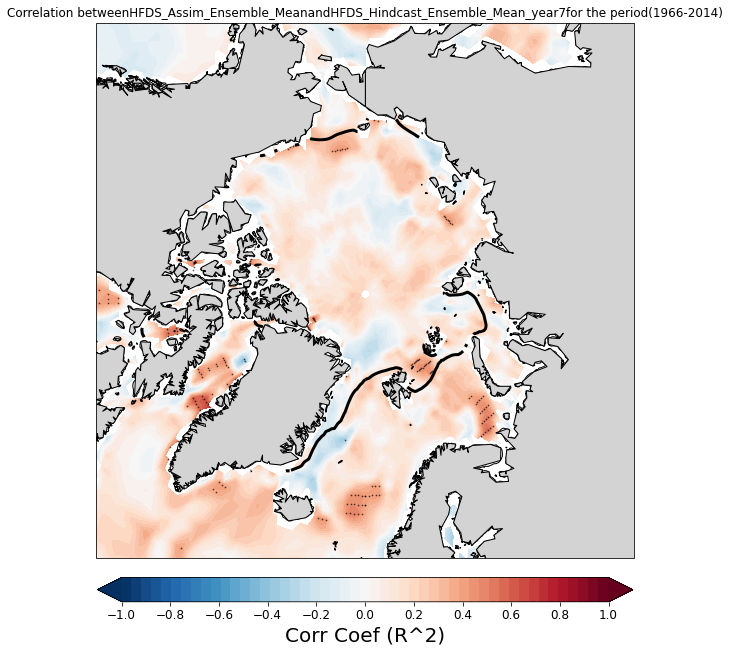

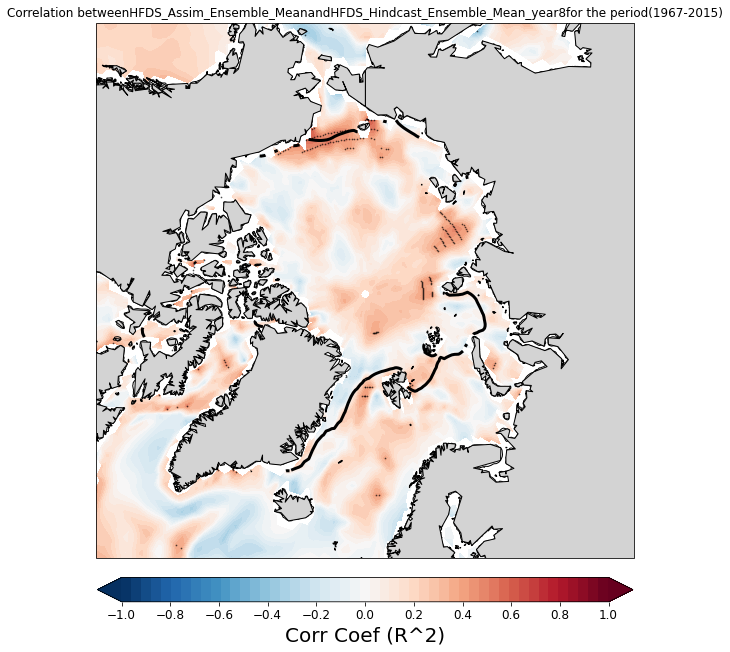

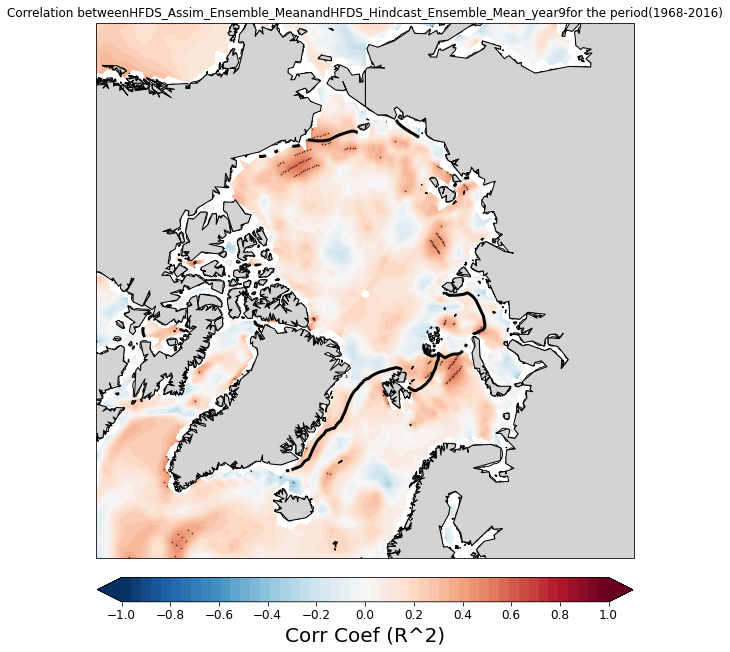

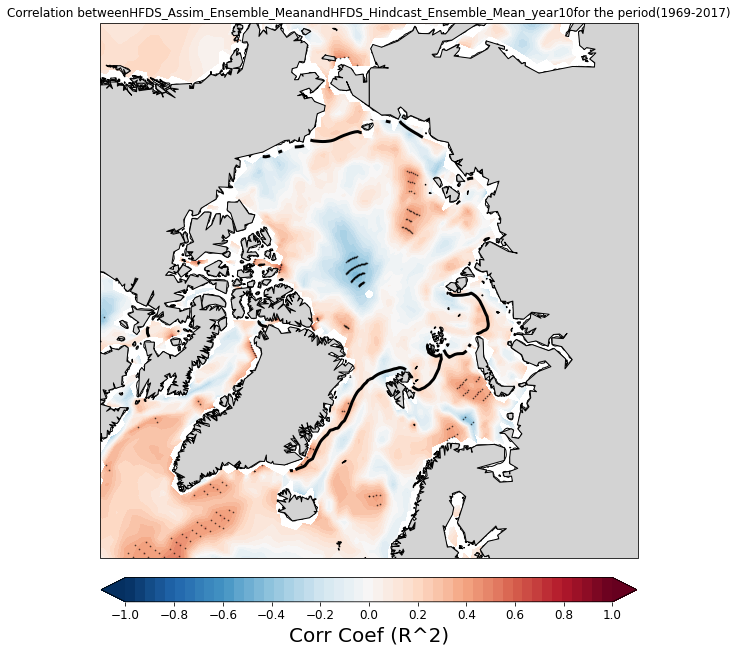

In [8]:
for i in range(2,11):
    ds2=xr.open_dataset('D:/TRABAJO/DATA/NORcpm/hindcast/hfds/Ensemble_mean/hfds_Omon_ensemean_year'+str(i)+'_anomaly.nc')
    ds2_filename='HFDS_Hindcast_Ensemble_Mean_year'+str(i)
    
    start_time = str(1959+i)
    end_time = str(2007+i)
    time_slice = slice(start_time, end_time)
    
    param='hfds'
    
    ds1_subset=ds1[param].sel(time=time_slice)
    ds2_subset=ds2[param].sel(time=time_slice)
    ds3_subset=ds3['siconc'].sel(time=time_slice)
    ds3_subset_mean=np.mean(ds3_subset,axis=0)
    
    
    tempxsalt = xr_linregress(ds2_subset, ds1_subset, dim='time')
    
    lat=tempxsalt.lat
    lon = tempxsalt.lon
    st  = tempxsalt.lat
    r_value=tempxsalt.r_value
    p_value=tempxsalt.p_value
    
    r_cyc, lon_cyc = add_cyclic_point(r_value, coord=lon)
    p_cyc, lon_cyc = add_cyclic_point(p_value, coord=lon)
    ice_cyc,lon_cyc= add_cyclic_point(ds3_subset_mean, coord=lon)
    
    sig_area   = np.where(p_cyc < 0.01)
    lons, lats = np.meshgrid(lon_cyc, lat)
    
    plt.figure(figsize=(12,12))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines(resolution = '50m')
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray"))
    image= ax.contourf(lon_cyc,lat ,r_cyc , transform=ccrs.PlateCarree(),
                           levels=np.linspace(-1,1,50),
                           cmap=cm.RdBu_r,
                           extend='both')
    
    image4=ax.contour(lon_cyc, lat, ice_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(90,90,1),
                           colors='k',
                           origin='lower',linewidths=3)
    
    _ = ax.scatter(lons[sig_area], lats[sig_area], marker = '.', s = 2, c = 'k', alpha = 0.6, transform = ccrs.PlateCarree())
    cb = plt.colorbar(image,ticks=np.linspace(-1,1,11), orientation='horizontal', pad=0.03, shrink = 0.8)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Corr Coef (R^2)', size=20)
    plt.title('Correlation between'+ds1_filename+'and'+ds2_filename+'for the period('+start_time+'-'+end_time+')')
    filename=ds1_filename+ds2_filename+start_time+end_time
    plt.savefig(path+filename+'.png')

In [6]:
np.linspace(-1,1,11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])